In [53]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.cmap'] = 'inferno'

In [89]:
from sklearn.cluster import MeanShift

def cluster(dataset_path, dataset_name, bandwidth=80000):
# https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00
    cluster_data = {}
    sim_data_names = [dataset_name]
    raw_data = pd.read_csv(dataset_path+dataset_name, sep='\t',header=None)
    centroids = pd.read_csv(dataset_path+dataset_name+'_centroids', sep='\t',header=None)
#     print('Original clusters with centroids')
#     plt.scatter(raw_data.loc[:,0], raw_data.loc[:,1], s=2, c=[(0,0,0)], alpha=0.1)
#     plt.scatter(centroids.loc[:,0], centroids.loc[:,1],s=20, c='#ff0000')
#     plt.show()
    # bandwidth : float, optional
    # Bandwidth used in the RBF kernel.
    # If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth; see the documentation for that function for hints on scalability (see also the Notes, below).
    # seeds : array, shape=[n_samples, n_features], optional
    # Seeds used to initialize kernels. If not set, the seeds are calculated by clustering.get_bin_seeds with bandwidth as the grid size and default values for other parameters.
    # bin_seeding : boolean, optional
    # If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points, where points are binned onto a grid whose coarseness corresponds to the bandwidth. Setting this option to True will speed up the algorithm because fewer seeds will be initialized. default value: False Ignored if seeds argument is not None.
    # min_bin_freq : int, optional
    # To speed up the algorithm, accept only those bins with at least min_bin_freq points as seeds. If not defined, set to 1.
    # cluster_all : boolean, default True
    # If true, then all points are clustered, even those orphans that are not within any kernel. Orphans are assigned to the nearest kernel. If false, then orphans are given cluster label -1.
    # n_jobs : int or None, optional (default=None)
    # The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(raw_data)
    ms_cluster_centers = ms.cluster_centers_
    print('Found clusters with meanshift algorithm')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(raw_data.loc[:,0], raw_data.loc[:,1], s=2, c=[(0,0,0)], alpha=0.1, label = None)
    ax.scatter(ms_cluster_centers[:,0], ms_cluster_centers[:,1], marker='v', 
               color='blue', s=10, linewidth=5, zorder=10, alpha=0.3, label='Meanshift centroids')
    ax.scatter(centroids.loc[:,0], centroids.loc[:,1], s=20, c='#ff0000', label='Ground truth')
    ax.legend()
    plt.show()
    print("Number of found clusters: ", ms_cluster_centers.shape[0])
    print("Proposed number of clusters: ", centroids.shape[0])
    

Found clusters with meanshift algorithm


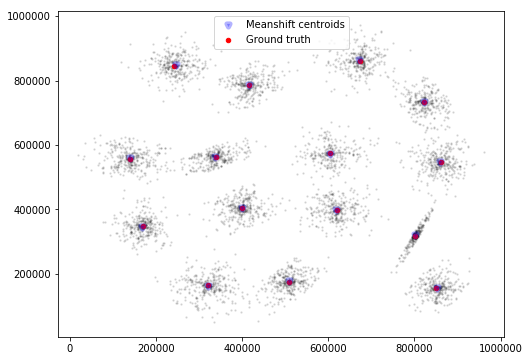

Number of found clusters:  15
Proposed number of clusters:  15


In [90]:
cluster('data/s-originals/', 's1')

Found clusters with meanshift algorithm


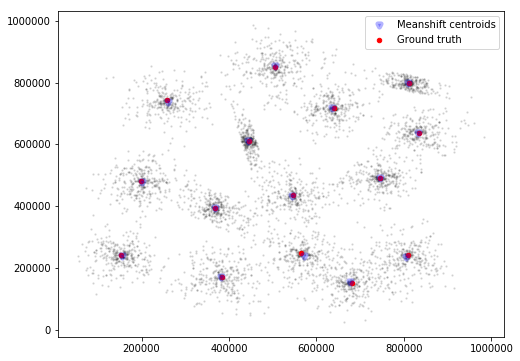

Number of found clusters:  15
Proposed number of clusters:  15


In [91]:
cluster('data/s-originals/', 's2')

Found clusters with meanshift algorithm


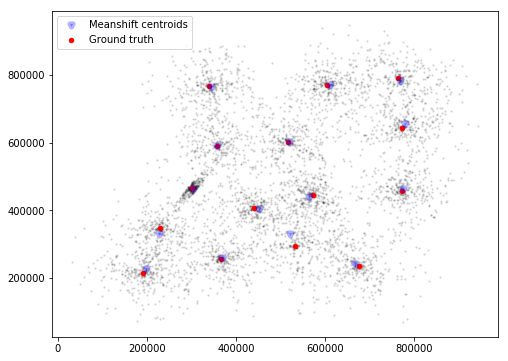

Number of found clusters:  15
Proposed number of clusters:  15


In [92]:
cluster('data/s-originals/', 's3')

Found clusters with meanshift algorithm


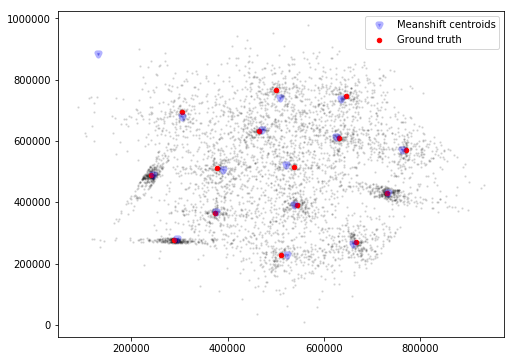

Number of found clusters:  16
Proposed number of clusters:  15


In [93]:
cluster('data/s-originals/', 's4')

In [2]:
cluster_data = {}
sim_data_names = ['s1']

In [3]:
for dn in sim_data_names:
    raw_data = pd.read_csv('data/s-originals/%s' % dn, sep='\t',header=None)
    centroids = pd.read_csv('data/s-originals/%s_centroids' % dn, sep='\t',header=None)

/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


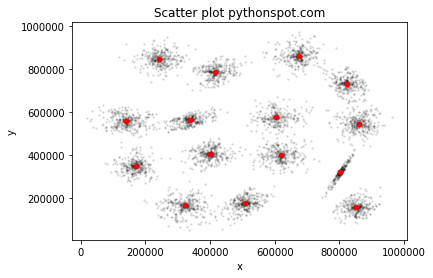

In [4]:
# Plot
plt.scatter(raw_data.ix[:,0], raw_data.ix[:,1], s=2, c=(0,0,0), alpha=0.1)
plt.scatter(centroids.ix[:,0], centroids.ix[:,1],s=20, c='#ff0000')
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# bandwidth : float, optional
# Bandwidth used in the RBF kernel.
# If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth; see the documentation for that function for hints on scalability (see also the Notes, below).
# seeds : array, shape=[n_samples, n_features], optional
# Seeds used to initialize kernels. If not set, the seeds are calculated by clustering.get_bin_seeds with bandwidth as the grid size and default values for other parameters.
# bin_seeding : boolean, optional
# If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points, where points are binned onto a grid whose coarseness corresponds to the bandwidth. Setting this option to True will speed up the algorithm because fewer seeds will be initialized. default value: False Ignored if seeds argument is not None.
# min_bin_freq : int, optional
# To speed up the algorithm, accept only those bins with at least min_bin_freq points as seeds. If not defined, set to 1.
# cluster_all : boolean, default True
# If true, then all points are clustered, even those orphans that are not within any kernel. Orphans are assigned to the nearest kernel. If false, then orphans are given cluster label -1.
# n_jobs : int or None, optional (default=None)
# The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.
ms = MeanShift(bandwidth=60000)
ms.fit(raw_data)
cluster_centers = ms.cluster_centers_
cluster_centers.shape

(16, 2)

/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


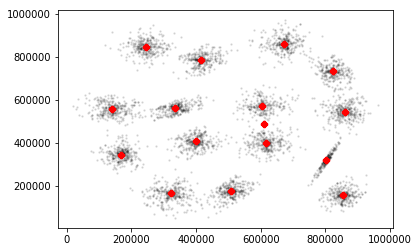

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(raw_data.ix[:,0], raw_data.ix[:,1], s=2, c=(0,0,0), alpha=0.1)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=20, linewidth=5, zorder=10)
# plt.scatter(centroids.ix[:,0], centroids.ix[:,1],s=20, c='#ff0000')
# plt.scatter(raw_data.ix[:,0], raw_data.ix[:,1], s=2, c=(0,0,0), alpha=0.1)
plt.show()

In [8]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_
cluster_centers

array([[ 1.20743131,  0.89138453,  0.96132509],
       [ 2.94769937, 10.04743606, 10.05123784],
       [ 4.92292338,  4.95769348,  4.98400776]])

In [9]:
from  scipy.spatial.distance import pdist,squareform,cdist
#from scipy.spatial import distance_matrix
#import matplotlib.pyplot as plt
import scipy


def k_means(data, n_clusters=3, n_init=20, max_iter=100, kernel=None,
            verbose=False,sigma = 1.0,use_kmean_controid=False):
    '''
    data: a numeric numpy array
    n_clusters: number of clusters
    n_init: number of different initializations to run kmeans
    max_iter: number of max iterations 
    kernel: "None", regular k means; "gaussian",  k means with gaussian kernel
    verbose: output detailed information
    sigma: the sigma parameter in the gaussian kernel 
    use_kmean_controid: for kenel K means, use the best controids from K means as initialization points.
    '''
    ### may not be efficient in terms of memory use
    ### no need to save whole history
    ### get whole hitory for debugging purpose
    controid_history = {}
    cluster_label_history = {}
    sse_history = np.zeros(shape=(n_init,1))
    ### start k-means
    n_points = data.shape[0]
    ### calculate the kernel matrix
    if kernel == 'gaussian':
        ### 'sqeuclidean': squared Euclidean distance
        kernel_matrix = np.exp(-0.5/(sigma**2)*squareform(pdist(data,'sqeuclidean')))
    ### repeat k-means n_init times 
    ### return the best one 
    np.seterr(divide='ignore', invalid='ignore')
    for i_init in range(n_init):
        if verbose: print('Random seed',i_init)
        #### set random seed
        np.random.seed(i_init)
        #### generate initial cluster labels
        cluster_labels = np.random.choice(range(n_clusters),size=n_points, replace=True)
        #### generate initial centroids
        #### randomly choose n_clusters points from the data as centroids
        if use_kmean_controid:
            #### run one K means
            print('Use best K means centroid')
            km_result = k_means(data, n_clusters, n_init=20, max_iter=100, kernel=None)
            centroids = km_result['best_controids']
        else:
            #### randomly choose n_clusters points from the data as centroids
            centroids = data[np.random.choice(np.arange(n_points), n_clusters, replace=False),:]
        for i_iter in range(max_iter):
            if verbose: print('Iteration',i_iter,end=', ')
            distance_to_centroids = np.zeros(shape=(data.shape[0],n_clusters))
            ######
            if kernel is None:
                distance_to_centroids = scipy.spatial.distance.cdist(data, centroids, 'euclidean')
            ######
            elif kernel == 'gaussian':
                dist1 = np.diag(kernel_matrix)
                cluster_ind_matrix = np.zeros(shape=(data.shape[0],n_clusters))
                for i_centroid in range(n_clusters):
                    cluster_ind_matrix[:,i_centroid] = (cluster_labels == i_centroid) + 0.0
                    kth_cluster_ind = (cluster_labels == i_centroid) + 0.0
                    kth_cluster_matrix = np.outer(kth_cluster_ind,kth_cluster_ind)
                    
                    dist2 = 2.0*np.sum(np.tile(kth_cluster_ind,(n_points,1))*kernel_matrix,axis=1)/np.sum(kth_cluster_ind)
                    dist3 = np.sum(kth_cluster_matrix*kernel_matrix)/np.sum(kth_cluster_matrix)
                    #print(dist1.shape,dist2.shape,dist3.shape,)
                    ### ord=2 is L2 distance
                    ### axis=1 is to calculate norm along columns
                    distance_to_centroids[:,i_centroid] = dist1-dist2+dist3
                    #break
            else:
                sys.exit('Kernel parameter is not correct!')
            #print(distance_to_centroids)
            ### assign the cluster labels
            cluster_labels = np.argmin(distance_to_centroids,axis=1)
            sse = np.sum((np.min(distance_to_centroids,axis=1))**2)
            if verbose: print('SSE',sse)
            ### re-calculate centroids
            previous_centroids = centroids
            centroids = np.array([data[cluster_labels == i_centroid].mean(axis = 0) for i_centroid in range(n_clusters)])
            ### if centroids don't change
            ### stop the iteration
            if np.all(previous_centroids == centroids):
                if verbose: print('Centroids do not change',i_iter)
                break
            #break
        controid_history[i_init] = centroids
        cluster_label_history[i_init] = cluster_labels
        sse_history[i_init] = sse
        #break
    np.seterr(divide='warn', invalid='warn')
    ### find the best initializations
    best_iter = np.argmin(sse_history)
    best_sse = sse_history[best_iter]
    best_controids = controid_history[best_iter]
    best_cluster_label = cluster_label_history[best_iter]
    
    return {'best_iter':best_iter,
            'best_sse':best_sse,
            'best_controids':best_controids,
            'best_cluster_label':best_cluster_label,
            'controid_history':controid_history,
            'cluster_label_history':cluster_label_history,
            'sse_history':sse_history,
           }

In [10]:
result = k_means(data,n_clusters=3,n_init=50,verbose=False,kernel=None)
y_pred = result['best_cluster_label']
plt.scatter(data[:, 0], data[:, 1], c=y_pred)
plt.title("K means")
plt.show()

NameError: name 'data' is not defined

In [ ]:
def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

In [ ]:
import math

clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

X = np.copy(raw_data)
look_distance = 10
kernel_bandwidth = 5

past_X = []
n_iterations = 5
for it in range(n_iterations):
    for i, x in enumerate(X):
        ### Step 1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.
        neighbours = neighbourhood_points(X, x, look_distance)
        
        ### Step 2. For each datapoint x ∈ X, calculate the mean shift m(x).
        numerator = 0
        denominator = 0
        for neighbour in neighbours:
            distance = euclid_distance(neighbour, x)
            weight = gaussian_kernel(distance, kernel_bandwidth)
            numerator += (weight * neighbour)
            denominator += weight
        
        new_x = numerator / denominator
        
        ### Step 3. For each datapoint x ∈ X, update x ← m(x).
        X[i] = new_x
    
    past_X.append(np.copy(X))

In [ ]:
# https://github.com/zziz/mean-shift/blob/master/mean-shift.py

# import numpy as np
# import random

# STOP_THRESHOLD = 1e-4
# CLUSTER_THRESHOLD = 1e-1

# def distance(a, b):
#     return np.linalg.norm(np.array(a) - np.array(b))

# def gaussian_kernel(distance, bandwidth):
#     return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)) ** 2)

# class MeanShift(object):
#     def __init__(self, kernel=gaussian_kernel):
#         self.kernel = kernel

#     def fit(self, points, kernel_bandwidth):

#         shift_points = np.array(points)
#         shifting = [True] * points.shape[0]

#         while True:
#             max_dist = 0
#             for i in range(0, len(shift_points)):
#                 if not shifting[i]:
#                     continue
#                 p_shift_init = shift_points[i].copy()
# #                 print(shift_points[i].shape, points.shape)
#                 shift_points[i] = self._shift_point(shift_points[i], points, kernel_bandwidth)
#                 dist = distance(shift_points[i], p_shift_init)
#                 max_dist = max(max_dist, dist)
#                 shifting[i] = dist > STOP_THRESHOLD

#             if(max_dist < STOP_THRESHOLD):
#                 break
#         cluster_ids = self._cluster_points(shift_points.tolist())
#         return shift_points, cluster_ids

#     def _shift_point(self, point, points, kernel_bandwidth):
#         shift_x = 0.0
#         shift_y = 0.0
#         scale = 0.0
#         for p in points:
#             dist = distance(point, p)
#             weight = self.kernel(dist, kernel_bandwidth)
#             shift_x += p[0] * weight
#             shift_y += p[1] * weight
#             scale += weight
#         shift_x = shift_x / scale
#         shift_y = shift_y / scale
#         return [shift_x, shift_y]

#     def _cluster_points(self, points):
#         cluster_ids = []
#         cluster_idx = 0
#         cluster_centers = []

#         for i, point in enumerate(points):
#             if(len(cluster_ids) == 0):
#                 cluster_ids.append(cluster_idx)
#                 cluster_centers.append(point)
#                 cluster_idx += 1
#             else:
#                 for center in cluster_centers:
#                     dist = distance(point, center)
#                     if(dist < CLUSTER_THRESHOLD):
#                         cluster_ids.append(cluster_centers.index(center))
#                 if(len(cluster_ids) < i + 1):
#                     cluster_ids.append(cluster_idx)
#                     cluster_centers.append(point)
#                     cluster_idx += 1
#         return cluster_ids


# from sklearn.datasets.samples_generator import make_blobs
# import matplotlib.pyplot as plt 

# def colors(n):
#   ret = []
#   for i in range(n):
#     ret.append((random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
#   return ret

# def main():
#     centers = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
#     X, _ = make_blobs(n_samples=150, centers=centers, cluster_std=0.4)
    
# #     print(X.shape)
    
# #     clusters = [[1,1,1],[5,5,5]]#,[3,10,10]]
# #     X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)
    
#     print(X.shape)
    
# #     return

#     X = raw_data.values
#     print(X.shape)
    
#     mean_shifter = MeanShift()
#     _, mean_shift_result = mean_shifter.fit(X, kernel_bandwidth=0.5)

#     np.set_printoptions(precision=3)
#     print('input: {}'.format(X))
#     print('assined clusters: {}'.format(mean_shift_result))
#     color = colors(np.unique(mean_shift_result).size)

#     for i in range(len(mean_shift_result)):
#         plt.scatter(X[i, 0], X[i, 1], color = color[mean_shift_result[i]])
#     plt.show()

# # if __name__ == '__main__':
# main()